In [ ]:
# Read data from a CSV file into a DataFrame

import pandas_datareader as pdr # Library
import pandas as pd # Library
'''
df = pdr.get_data_tiingo('GOOG', api_key='e2794c319a4041c917e5b349b68c830c5963687e')
df.to_csv('GOOG.csv')
'''

# Loads historical stock price data (assuming the 'Close' column contains the closing prices)

df = pd.read_csv('/content/sample_data/AAPL2.csv')
# The function 'pd.read_csv' reads the file and creates a data frame from it, then its data is stored into a pandas DataFrame object called "df"
df.head() # shows the first few rows of df (data frame)



,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [ ]:
df.tail() #shows the last few rows of df (data frame)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [ ]:
# Extracts 'close' column and create "numpy array"
# (what is a numpy array?)

df1=df.reset_index()['close'] # Df1 is assigned to the 'close' column (why does it reset the index though?)
df1 # Length of array (1258)

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

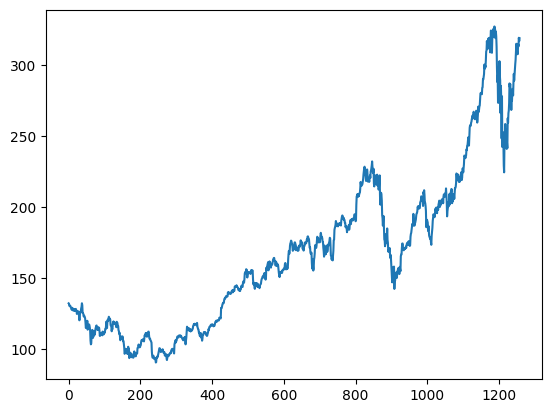

In [ ]:

import matplotlib.pyplot as plt # Plotting library allows us to use plots
plt.plot(df1) # Creates a line plot of the data in the df1

# (put x and y-axis titles!)
# x-axis (Index per Dates)
# y-axis (Stock Price)
# Title (Index per Dates vs Stock Price)

In [ ]:
import numpy as np # Library that helps with mathematical operations on arrays
df1 # (figure out why before there was array before)
# An array is a list


0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [ ]:
# Scales the data between 0 and 1 (why do we scale it?), (what is MinMaxScaler what does it do?), (why do we reshape)
# (what does the -1,1 stand for?)
# You can get better results when you make the data fit between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

Time series data should be divided using Train-Test split. 70% of the data used for training and the other 30 % used for testing.

In [ ]:
# Splits data into training and testing sets
# Time series data: ?
# Train set: a subset to train a model
# Test set: a subset to test the trained model.


training_size =int(len(df1)*0.65) # 65% of total length of df1 is the training size (size)
test_size = len(df1)-training_size # 35% of total length of df1 is the test size

# train_data and test_data are the actual subsets of data used for training/testing
train_data = df1[0:training_size,:] # creates a variable that contains the first 65% of elements
test_data = df1[training_size:len(df1),:1] # creates a variable that contains the fist 35% of elements

# (why do we need to split the time series data?)

df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [ ]:
training_size, test_size
# Traning size = len(train_data)
# Test size = len(test_data)

# Makes sense because 817 + 441 = 1258 (which is how many indexes there are)
# shows how many elements are in training_size or test_size

(817, 441)

In [ ]:
train_data # shows all the particular values in 'train_data'

In [ ]:
test_data # shows all the particular values in 'test_data'

simple definition:

In [ ]:
# Function to create input-output pairs for LSTM model
# (what are input-output pairs)

import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], [] #initializes two empty lists
	# dataX = [] empty list
	# dataY = [] empty list
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   # i=0, 0,1,2,3-----99   100 (explain this)
		dataX.append(a) # Attaches 'a' to the list
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [ ]:
# Time steps:
# determines how many features you have (what are features?)
# allows for the sequences of 100 consecutive data to be used
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)



code below, 3 dimensional arrays are required in deep learning models like RNNs and CNNs. X_train explained: X_train.reshape[0] = the number of sequences in the x_train. X_train.shape[1] = legnth of each sequence( number of time steps) in the x train array. X_test explained is the same.

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
#reshaping the numPy arrays into a 3 dimension , adding 1 more dimension to the 2


In [ ]:
#Stacked LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

input_shape = (100,1) means each input sequence has 100 time steps and each time step has 1 feature. 50 = memory cells/neuron. The second layer has no input shape because it takes it from the previous layer.

In [ ]:

model=Sequential() # This line initializes a sequential model. Allows you to add one layer of LSTM at a time in a sequence
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) # This adds the first LSTM layer to the model.
model.add(LSTM(50,return_sequences=True)) # This adds the second layer with memory cells and returns sequences
model.add(LSTM(50)) # 50 memory cells again, but instead there is no return_sequences , so the layer will return only the final output of the sequence.
model.add(Dense(1)) # this layer takes the output from the previous LSTM layer but reduces it to 1
model.compile(loss='mean_squared_error',optimizer='adam') # The loss parameter is set to 'mean_squared_error',
# which is a common loss function. The optimizer parameter is set to 'adam', which is a popular optimization algorithm

The code below, checks the output shapes of each layer and verifies the number of trainable parameters in the model

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:



model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)
#This code performs the training of a neural network model

Epoch 1/100
12/12 [==============================] - 8s 268ms/step - loss: 0.0209 - val_loss: 0.0441
Epoch 2/100
12/12 [==============================] - 2s 146ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 3/100
12/12 [==============================] - 2s 144ms/step - loss: 9.1635e-04 - val_loss: 0.0042
Epoch 4/100
12/12 [==============================] - 2s 204ms/step - loss: 6.9421e-04 - val_loss: 0.0041
Epoch 5/100
12/12 [==============================] - 2s 153ms/step - loss: 6.7323e-04 - val_loss: 0.0041
Epoch 6/100
12/12 [==============================] - 2s 141ms/step - loss: 6.1766e-04 - val_loss: 0.0040
Epoch 7/100
12/12 [==============================] - 2s 140ms/step - loss: 5.9694e-04 - val_loss: 0.0042
Epoch 8/100
12/12 [==============================] - 2s 141ms/step - loss: 5.9356e-04 - val_loss: 0.0039
Epoch 9/100
12/12 [==============================] - 2s 144ms/step - loss: 5.8213e-04 - val_loss: 0.0039
Epoch 10/100
12/12 [==============================] - 2s 165ms/

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
#doing the prediction and checking performance metrics
train_predict = model.predict(X_train) #prediction for the X_train data
test_predict = model.predict(X_test)    #prediction for the x_test data


11/11 [==============================] - 0s 36ms/step


In [ ]:
#transform back to orginal form
train_predict=scaler.inverse_transform(train_predict) #we already scaled but we have to do the reverse
test_predict=scaler.inverse_transform(test_predict)

# so we can find out the root-mean-square performance metrics

the code below, the target value is

In [ ]:
#calculating the RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error #mean_squared_error is a performance metrics
math.sqrt(mean_squared_error(y_train, train_predict)) #It measures the avg squared difference between the predicted values and actual) values of the target variable.

0.013430817264898979

In [ ]:
#Test DATA RMSE
math.sqrt(mean_squared_error(ytest,test_predict))


0.032075079505760974

The code below, creates two arrays trainPredictPlot and testPredictPlot to plot the training and testing predictions. It shifts the predictions to align them with the original data and then visualizes the original data. It allows us to compare the mdoels prediction with the actual data. Come back to the code later, and read everything.


Text(0, 0.5, 'Stock price')

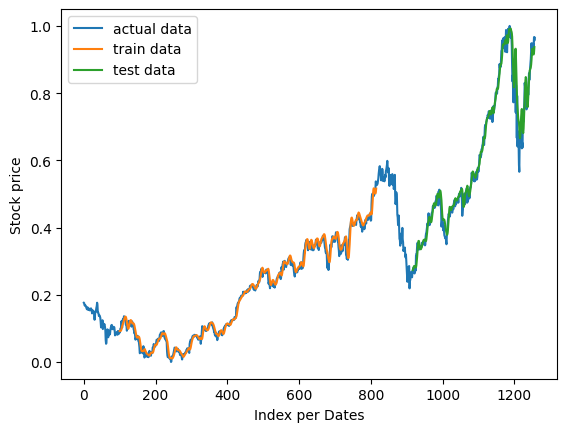

In [ ]:
# shift train predictions for plotting
look_back=100 # time step is 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(["actual data","train data","test data"])

plt.show

plt.xlabel("Index per Dates")
plt.ylabel("Stock price")


#orange line: train data, green line: test data